In [1]:
# Melanie Schwartz
# sno122

## Lab 4B

Lab 4 consists of two exercises on reading in data from external CSV and JSON files into Pandas DataFrames.

### Tasks

In this exercise, you will analyze in 2022 data on FIFA soccer players' data. You will read in these data in the ```fifa_22.csv``` CSV file data into a Pandas dataframe. This file contains information about soccer clubs from 2022. The tasks are:

1. Clean the data
2. First analysis - Overall rating versus wage
3. Second analysis - Average overall players rating per club
4. Third analysis - Distribution of wages in clubs with the best 10 average overall ratings

More information is provided below on each of these tasks. 

#### Clean the Data

Read the ```fifa_22.csv``` capturing only the the following columns into a Pandas dataframe:
- ID
- Overall player rating
- Wage
- Club

Remove any player who does not belong to a club and any player who makes 0 Euros.

#### First Analysis

Investigate the relationship between a player's overall rating compared to their wage. Plot this data as a scatterplot with the x axis representing the rating and the y axis representing the wage.

#### Second Analysis

Investigate the data based on the club in terms of average overall rating of all players in that club. Plot these data as a bar graph for the top 10 clubs in terms of average overall rating. The x axis will be the club. The y axis will be the average overall in <strong>descending</strong> order, which will help you determine the highest valued teams in terms of their players. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

#### Third Analysis

Investigate the distribution of salaries for the top 10 clubs in terms of average overall rating. 
You may need to create a new ```DataFrame``` to create this plot. Plot these data as a boxplot to show the distribution of data. The x axis will be the club while the y axis will be the wage. 

This task will require you to group the ```DataFrame``` by ```Club```. You may also need to create a new ```DataFrame``` for to create this plot. 

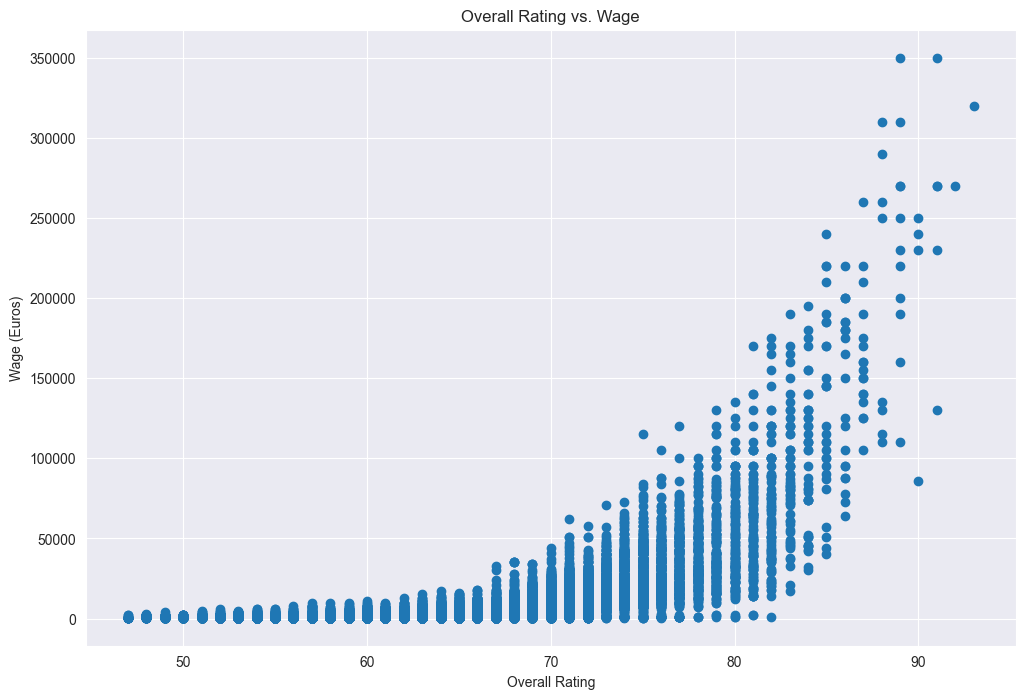

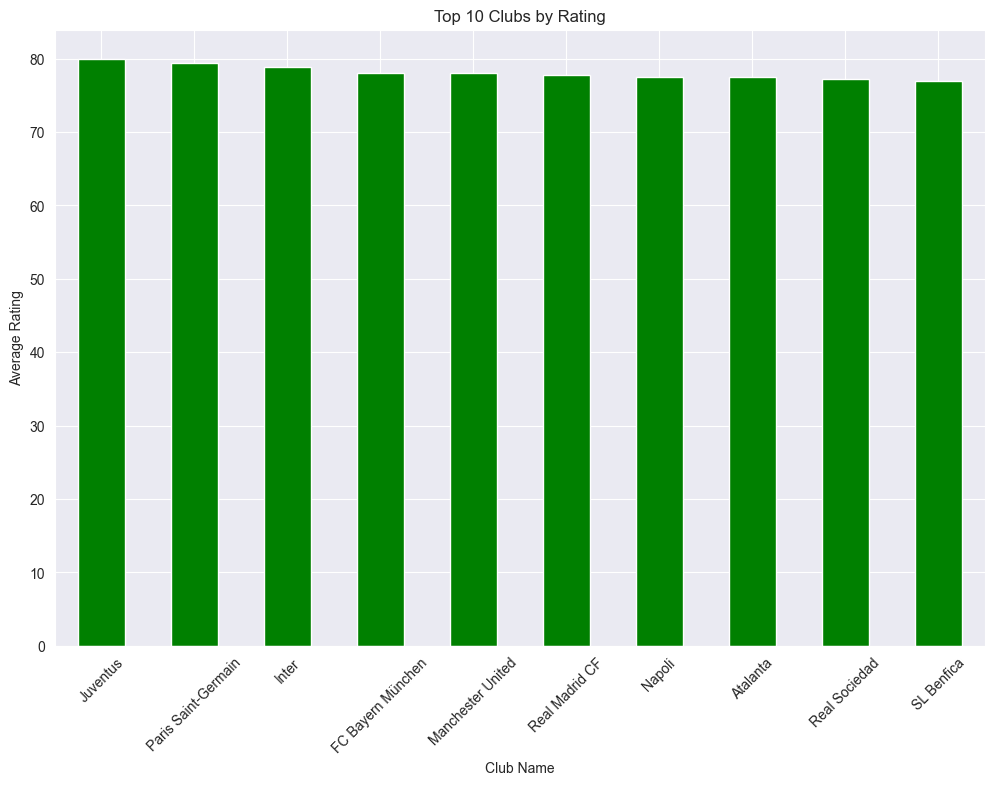

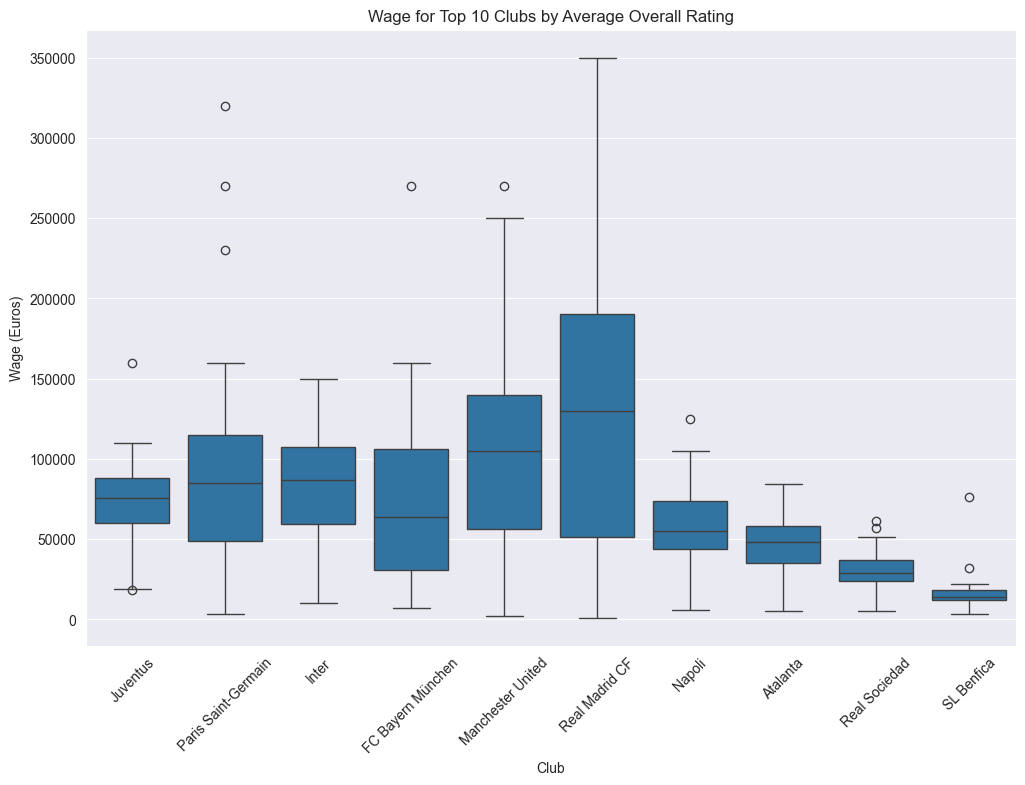

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Each of the tasks below will require you to work with and use modified versions of
# the original DataFrames
# TODO: First analysis: Investigate the relationship between a player's overall rating compared to their wage. Plot this data as a scatterplot with the x axis representing the rating and the y axis representing the wage.
# Path to csv/cleaning data
# Specify columns needed from the csv
df = pd.read_csv('fifa_22.csv', usecols=['sofifa_id', 'overall', 'wage_eur', 'club_name'])

# Remove any players that make 0 or are not apart of a club
df = df[df['club_name'].notnull() & (df['wage_eur'] != '€0')]

# Display the correlation between wage and rating
plt.figure(figsize=(12, 8))
plt.scatter(df['overall'], df['wage_eur'])
plt.title('Overall Rating vs. Wage')
plt.xlabel('Overall Rating')
plt.ylabel('Wage (Euros)')
plt.show()

# TODO: Second analysis: Investigate the data based on the club in terms of average overall rating of all players in that club. Plot these data as a bar graph for the top 10 clubs in terms of average overall rating. The x axis will be the club. The y axis will be the average overall in descending order, which will help you determine the highest valued teams in terms of their players. This task will require you to group the 'DataFrame' by 'Club'. You may also need to create a new 'DataFrame' for to create this plot. 
# Get the top 10 clubs
averageRatings = df.groupby('club_name')['overall'].mean().sort_values(ascending=False).head(10)

# Bar plot 
plt.figure(figsize=(12, 8))
averageRatings.plot(kind='bar', color='green')
# Better readability for team name
plt.xticks(rotation=45)
plt.title('Top 10 Clubs by Rating')
plt.xlabel('Club Name')
plt.ylabel('Average Rating')
plt.show()

# TODO: Third analysis: Investigate the distribution of salaries for the top 10 clubs in terms of average overall rating. You may need to create a new 'DataFrame' to create this plot. Plot these data as a boxplot to show the distribution of data. The x axis will be the club while the y axis will be the wage. This task will require you to group the 'DataFrame' by 'Club'. You may also need to create a new 'DataFrame' for to create this plot. 
# Get the top 10 clubs based on average ratings
topClubs = averageRatings.head(10).index

# DataFrame that includes only players from the top 10 clubs
topClubsDF = df[df['club_name'].isin(topClubs)]

# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='club_name', y='wage_eur', data=topClubsDF, order=topClubs)
# Better readability for team name
plt.xticks(rotation=45)
plt.title('Wage for Top 10 Clubs by Average Overall Rating')
plt.xlabel('Club')
plt.ylabel('Wage (Euros)')
plt.show()

## Questions

1. What is the relationship between a player's Overall rating compared to their Wage? Is there any significant relationship between a player's rating and their wage?

2. Which clubs has the highest player Overall ratings on average? Find some information on one of the top three clubs in the barplot and report any information about the success of those clubs around 2022. 

3. Which clubs have the smallest and largest distribution in terms of wages? Are there any extreme outliers in this data? What information can you find about those outliers in terms of how extreme their wages are compared to the rest of the club?

## Answers

Enter your responses here

1. The relationship between a player's overall rating compared to their wage shows a positive correlation. As we see a player's rating increase, their earned wage also increases.

2. The clubs with the highest player overall rating on average are Juventus, Paris Saint-Germain, and Inter. Paris Saint-Germain FC's successes around to the 2022 season can be attributed to the popularity of the player's on their roster. Lionel Messi is a household name that played for PSG from 2021-2023. His contributions along with other notable players on the roster during this time led to the club's 49th consecutive season playing in the top league of French football - Ligue 1. In addition to player successes, Paris Saint-Germain is also the richest football club in France and one of the wealthiest football clubs in the world. This type of wealth and business decisions help in attracting top talent to the PSG organization, leading to more wins.

3. The club with the smallest distribution of wages is SL Benfica, while Real Madrid CF has the largest distribution. The extreme outliers in terms of wages are players from clubs such as Paris Saint-Germain, FC Bayern Munchen, Manchester United, and Real Madrid CF. These outliers have higher wages compared to the rest of their respective clubs, with wages ranging from 270,000 to 350,000 Euros, significantly exceeding the typical wage range.